In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial.transform import Rotation

In [2]:
accF1 = np.random.uniform(0.2, 0.5, size=(3, 60))
accF2 = np.random.uniform(0.4, 0.75, size=(3, 10))
accF3 = np.random.uniform(0.2, 0.5, size=(3, 30))

accM1 = np.random.uniform(0.3, 0.8, size=(3, 60))
accM2 = np.random.uniform(0.65, 0.99, size=(3, 10))
accM3 = np.random.uniform(0.4, 0.7, size=(3, 30))

accF = np.concatenate((accF1, accF2, accF3), axis=1)
accM = np.concatenate((accM1, accM2, accM3), axis=1)

meanF = np.mean(accF)
stdF = np.std(accF)
meanM = np.mean(accM)
stdM = np.std(accM)
mean = np.array([meanF, meanM])
std = np.array([stdF, stdM])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


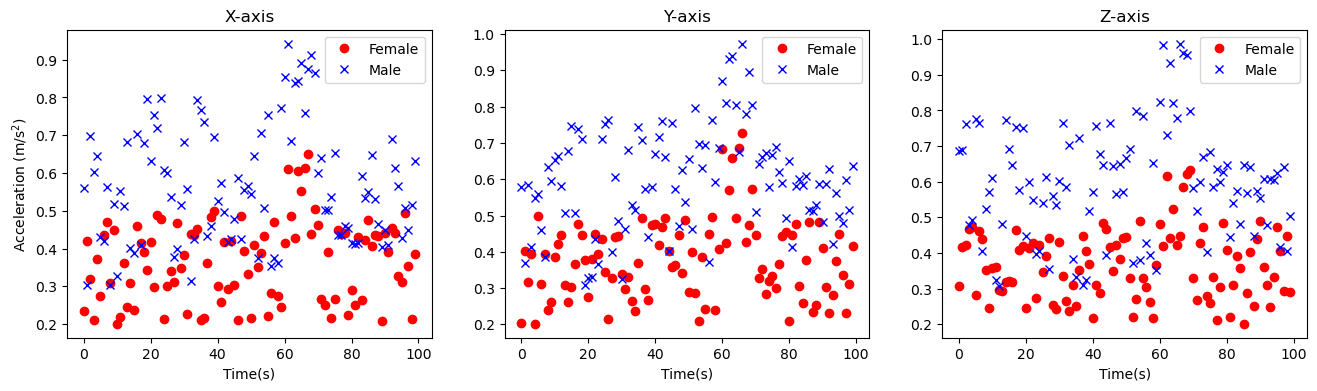

In [11]:
# Plotting raw data
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plt.subplots_adjust(hspace=0.2)

for i in range(3):
    axs[i].plot(accF[i],'o', c='r', label='Female')
    axs[i].plot(accM[i],'x', c='b', label='Male')
    axs[i].set_title(f'{["X", "Y", "Z"][i]}-axis')
    axs[i].legend()
    axs[i].set_xlabel('Time(s)')
axs[0].set_ylabel('Acceleration (m/s$^2$)')

plt.savefig(r'C:\\Users\\dorot\\Desktop\\PaperMaster\\Graphics\\allAxis.eps')

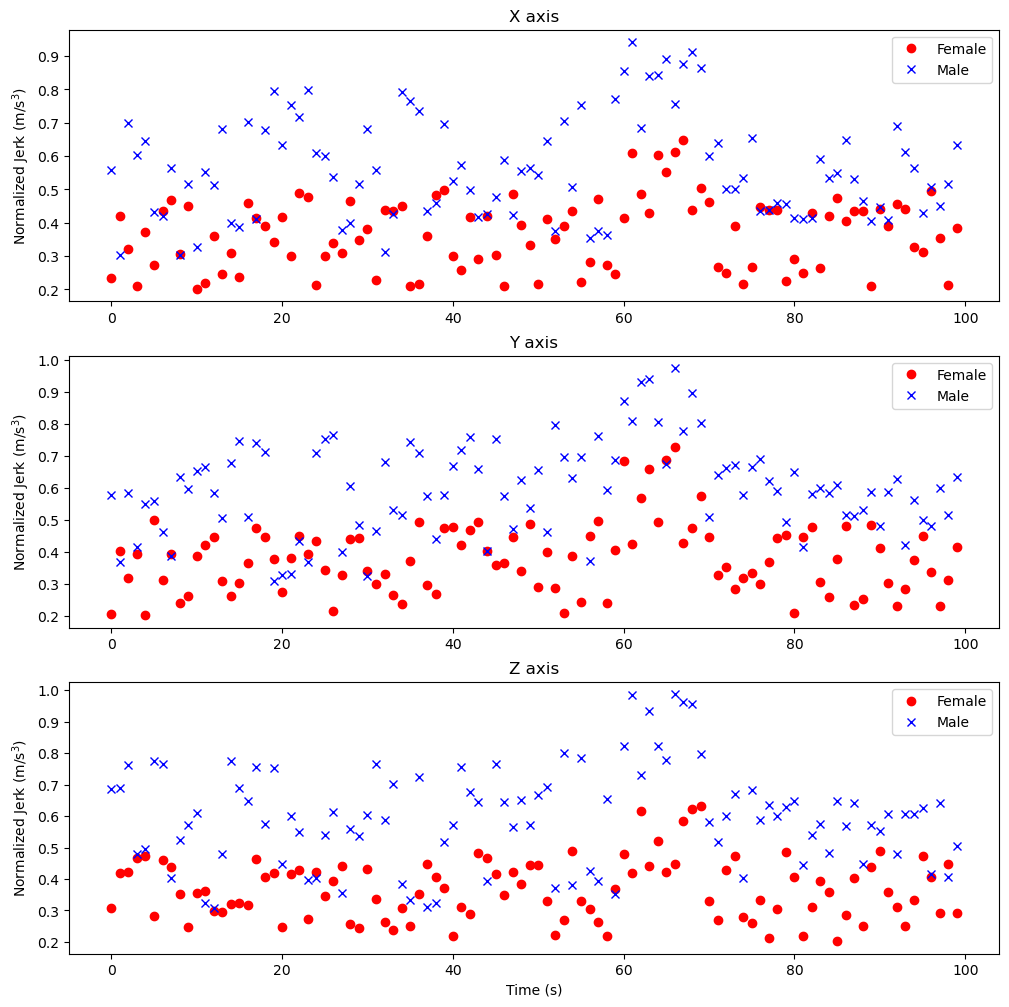

In [4]:
# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 12))
plt.subplots_adjust(hspace=0.2)

# Plotting accelerometer data and compensated data
for i in range(3):
    axs[i].plot(accF[i], 'o', color='red', label='Female')
    axs[i].plot(accM[i], 'x', color='blue', label='Male')
    axs[i].set_title(f'{["X", "Y", "Z"][i]} axis')
    axs[i].set_ylabel('Normalized Jerk (m/s$^3$)')
    axs[i].legend()
axs[2].set_xlabel('Time (s)')
plt.show()

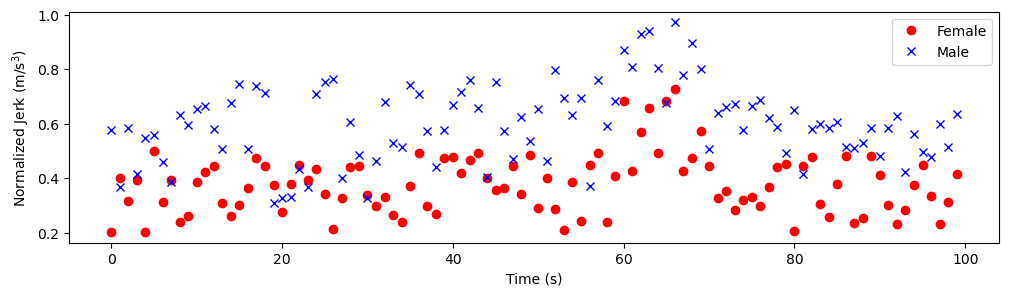

In [5]:
# Index for the second axis (Y-axis)
axis_index = 1

# Plotting accelerometer data for the Y-axis
plt.figure(figsize=(12, 3))  # Adjust the figure size if needed
plt.plot(accF[axis_index], 'o', color='red', label='Female')
plt.plot(accM[axis_index], 'x', color='blue', label='Male')
plt.xlabel('Time (s)')
plt.ylabel('Normalized Jerk (m/s$^3$)')
plt.legend()
plt.show()

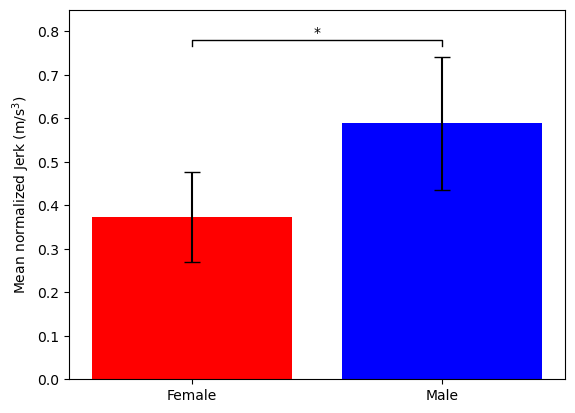

In [6]:
ax = plt.axes()

significant_combinations = [(0, 1), 0.02]
bottom, top = ax.get_ylim()
y_range = 0.2

plt.bar(['Female', 'Male'], mean, yerr=std, capsize=6, color=['r', 'b'])
plt.ylabel('Mean normalized Jerk (m/s$^3$)')
# plt.xlabel(x_axis)

# Columns corresponding to the datasets of interest
x1 = significant_combinations[0][0]
x2 = significant_combinations[0][1]
# What level is this bar among the bars above the plot?
level = len(significant_combinations) - i
# Plot the bar
bar_height = (y_range * 0.05 * level) + top - 0.22
bar_tips = bar_height - (y_range * 0.07)
plt.plot(
    [x1, x1, x2, x2],
    [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k'
)
# Significance level
p = 0.02
if p < 0.001:
    sig_symbol = '***'
elif p < 0.01:
    sig_symbol = '**'
elif p < 0.05:
    sig_symbol = '*'
text_height = bar_height + (y_range * 0.01)
plt.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k')
    

ax.set_ylim(top = 0.85)

plt.savefig(r'C:\\Users\\dorot\\Desktop\\PaperMaster\\mean.eps')